In [2]:
#!pip3 install gdown

In [3]:
# Common useful packages
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy

# Useful package for reading and processing spectral data
import spectral

# Scripts associated with the SML4SI textbook
from scripts_M1 import *

In [4]:
# Download the required imagery
download_Washington_DC_Image()

# PART 1: Open the image and load the data as a numpy array.
- We use the spectral package for reading the metadata.
- You should become familiar with the Spectral package: https://www.spectralpython.net/

In [5]:
# Open the image. This reads the metadata, but not the image data. 
#    
#    CODING NOTES: 
#    1. The function spectral.envi.open takes filename(s) as input, and 
#       opens either a hyperspectral image or spectral library file.
#       See: https://www.spectralpython.net/class_func_ref.html?highlight=envi#spectral.io.envi.open
#
#    2. The variable im is an object, which has both associated variables and methods that we will use.
#       It is an instance of the spyfile class.
#       See: https://www.spectralpython.net/class_func_ref.html?highlight=envi#spectral.SpyFile

fname = 'spectral_images/WashingtonDC_Ref_156bands/WashingtonDC_Ref_156bands'
im = spectral.envi.open(fname+'.hdr', fname)

In [6]:
# Print the number of rows, columns, and bands in the iamge, 
# which are stored in variables associated with the im object.
#    CODING NOTES: using f'...{var_name}' is a seamless way to incorporate variable values in text.]

print(f'Number of rows: {im.nrows}') 
print(f'Number of columns: {im.ncols}')
print(f'Number of bands: {im.nbands}')

# Print the wavelengths for the bands. Metadata about the bands are stored in the subclass im.bands.
# Each band is a light measured across a range of wavelengths. 
# The center values of the ranges is stored in the varaible im.bands.centers.

print(f'Wavelengths for the band cetners: {im.bands.centers}')

Number of rows: 1280
Number of columns: 307
Number of bands: 156
Wavelengths for the band cetners: [421.567993, 425.078003, 428.631989, 432.234985, 435.888, 439.595001, 443.358002, 447.182007, 451.066986, 455.019012, 459.040009, 463.134003, 467.302002, 471.549988, 475.880005, 480.298004, 484.804993, 489.406006, 494.105011, 498.906006, 503.813995, 508.832001, 513.966003, 519.221008, 524.599976, 530.109009, 535.752014, 541.536987, 547.46698, 553.546997, 559.783997, 566.182983, 572.750977, 579.491028, 586.411011, 593.518005, 600.815002, 608.309021, 616.005981, 623.911987, 632.031006, 640.367981, 648.929993, 657.721008, 666.744995, 676.005005, 685.505981, 695.249023, 705.237, 715.473022, 725.955994, 736.685974, 747.664001, 758.887024, 770.353027, 782.059998, 794.002991, 806.177002, 818.575989, 831.195007, 844.025024, 857.059021, 870.286987, 883.702026, 897.291992, 911.047974, 924.958984, 939.015015, 953.203003, 967.513977, 981.934998, 996.453979, 1011.059998, 1025.75, 1040.51001, 1055.3100

In [7]:
# Load the image data into a numpy array.
#    See: https://www.spectralpython.net/class_func_ref.html?highlight=envi#spectral.SpyFile.load

imArr = im.load()
print(f'Shape of the image numpy array: {imArr.shape}')

Shape of the image numpy array: (1280, 307, 156)


# PART 2: Viewing a grayscale and color image from the spectral image.

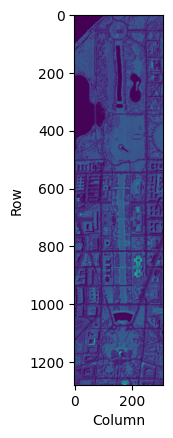

In [8]:
# View a single band from the image
band_idx = 50
plt.imshow(imArr[:,:,band_idx]);
plt.xlabel('Column');
plt.ylabel('Row');

x coordinate = 1133
y coordinate = 164


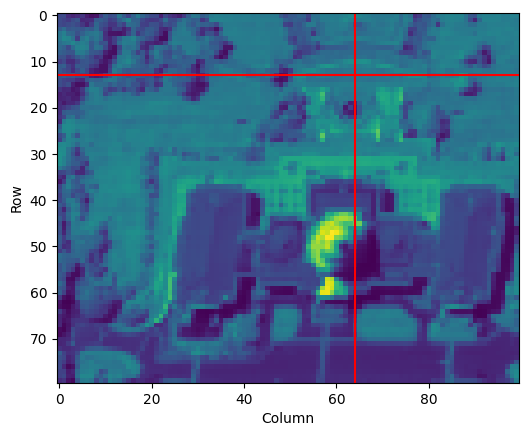

In [9]:
# View a single band from the image
band_idx = 50
x = 64
y = 13
col_min = 1120
ro_min = 100
plt.imshow(imArr[col_min:1200,ro_min:200,band_idx]); #1280, 307, 156
plt.axvline(x = x, color = 'red')
plt.axhline(y = y, color = 'red')
#Dome: [1167, 160]
plt.xlabel('Column');
plt.ylabel('Row');

print(f'x coordinate = {col_min + y}')
print(f'y coordinate = {ro_min + x}')

### The image is longer than it is wide.  It will be easier to view if we rotate it using np.rot90.
### To have the y-axis display correct labels on the column numbers, we use np.flip(np.rot90(...,axis=0) together with plt.gca().invert_yaxis().
### Also, we use the grayscale colormap, rather than the default viridis.

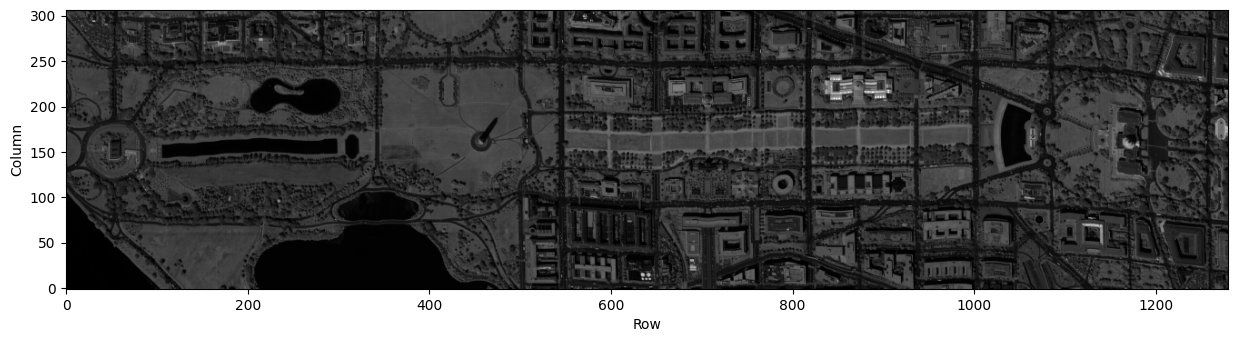

In [10]:
# View a single band from the iamge
band_idx = 50
plt.figure(figsize=(15,5)) # This creates a figure of the specified size using figsize=(width,height).
plt.imshow(np.flip(np.rot90(imArr[:,:,band_idx]), axis=0), cmap='gray');
plt.gca().invert_yaxis()  # Invert the y-axis to fix the tick order
plt.xlabel('Row');
plt.ylabel('Column');

## Create a color RGB (Red-Green-Blue) image from the hyperspectral image.

In [11]:
# Create a numpy array of the wavelengths for the iamge bands
wl = np.asarray(im.bands.centers)

# determine the indices for the red, green, and blue bands
red_band_idx = np.argmin(np.abs(wl-640))
green_band_idx = np.argmin(np.abs(wl-550))
blue_band_idx = np.argmin(np.abs(wl-460))

print(f'red index = {red_band_idx}, with wavelength = {wl[red_band_idx]}')
print(f'green index = {green_band_idx}, with wavelength = {wl[green_band_idx]}')
print(f'blue index = {blue_band_idx}, with wavelength = {wl[blue_band_idx]}')

red index = 41, with wavelength = 640.367981
green index = 28, with wavelength = 547.46698
blue index = 10, with wavelength = 459.040009


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..12178.0].
/var/folders/s8/mm0m1zj51zn4xbw55t3kxv7h0000gn/T/ipykernel_31668/3799153045.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(np.arange(0, im.ncols, 50))


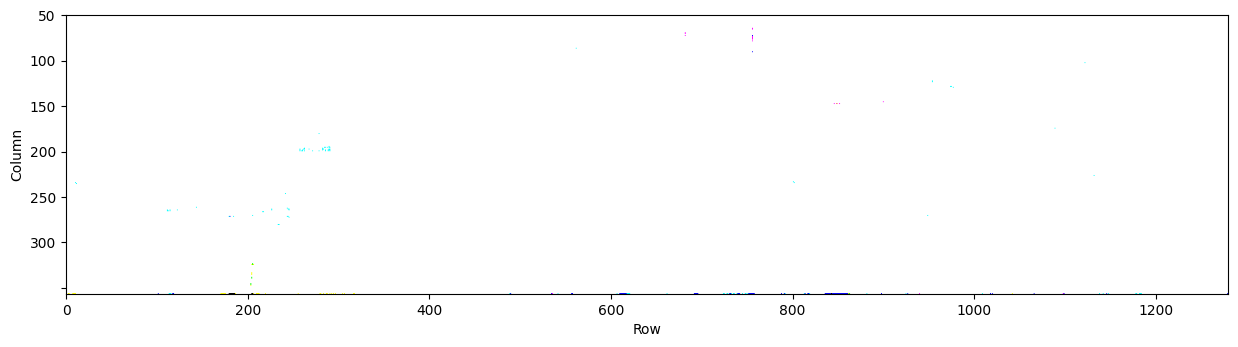

In [12]:
# View a single band from the image 
#     - this code shows that the imshow will not display the image properly unless we rescale the pixel values

# Create a numpy array for the RGB image with shape (nrows, ncold, 3)
imRGB = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]

# plot the arraay
plt.figure(figsize=(15,5)) 
plt.imshow(np.rot90(imRGB));
plt.gca().set_yticklabels(np.arange(0, im.ncols, 50))
plt.xlabel('Row');
plt.ylabel('Column');

Initial min=0.0, initial max=9877.0
New min=0.0, new max=1.0
Initial min=0.0, initial max=12178.0
New min=0.0, new max=1.0
Initial min=0.0, initial max=11836.0
New min=0.0, new max=1.0


/var/folders/s8/mm0m1zj51zn4xbw55t3kxv7h0000gn/T/ipykernel_31668/1758911566.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  imRGB[:,:,i] = imRGB[:,:,i] - np.min(imRGB[:,:,i])
/var/folders/s8/mm0m1zj51zn4xbw55t3kxv7h0000gn/T/ipykernel_31668/1758911566.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  imRGB[:,:,i] = imRGB[:,:,i] / np.max(imRGB[:,:,i])


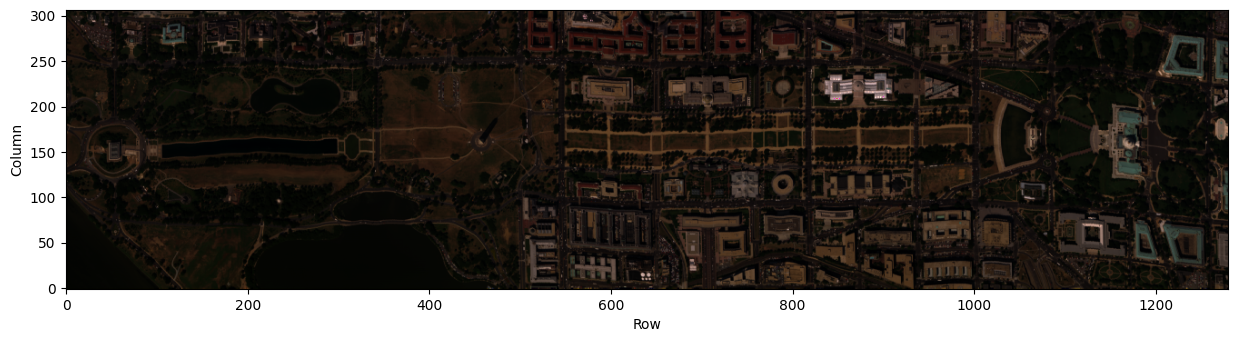

In [13]:
# View a single band from the image 
#     - this code shows rescale / normalize the pixel values in each band to [0,1] for viewing

# Create a numpy array for the RGB image with shape (nrows, ncold, 3)
imRGB = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]
for i in range(3):
    print(f'Initial min={np.min(imRGB[:,:,i])}, initial max={np.max(imRGB[:,:,i])}')
    imRGB[:,:,i] = imRGB[:,:,i] - np.min(imRGB[:,:,i])
    imRGB[:,:,i] = imRGB[:,:,i] / np.max(imRGB[:,:,i])
    print(f'New min={np.min(imRGB[:,:,i])}, new max={np.max(imRGB[:,:,i])}')

# plot the arraay
plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(imRGB), axis=0));
plt.gca().invert_yaxis()  
plt.xlabel('Row');
plt.ylabel('Column');

### This image apears dark and has low contrast.
### The plot of the image will look better if we clip the values in each band so that the top 2% of pixels all have the maximum value, and the bottom 2% have the minimum value.

/var/folders/s8/mm0m1zj51zn4xbw55t3kxv7h0000gn/T/ipykernel_31668/2176674047.py:29: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  single_band[single_band < lower_thresh] = lower_thresh
/var/folders/s8/mm0m1zj51zn4xbw55t3kxv7h0000gn/T/ipykernel_31668/2176674047.py:31: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  single_band[single_band > upper_thresh] = upper_thresh
/var/folders/s8/mm0m1zj51zn4xbw55t3kxv7h0000gn/T/ipykernel_31668/2176674047.py:33: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  single_band = single_band - lower_thresh


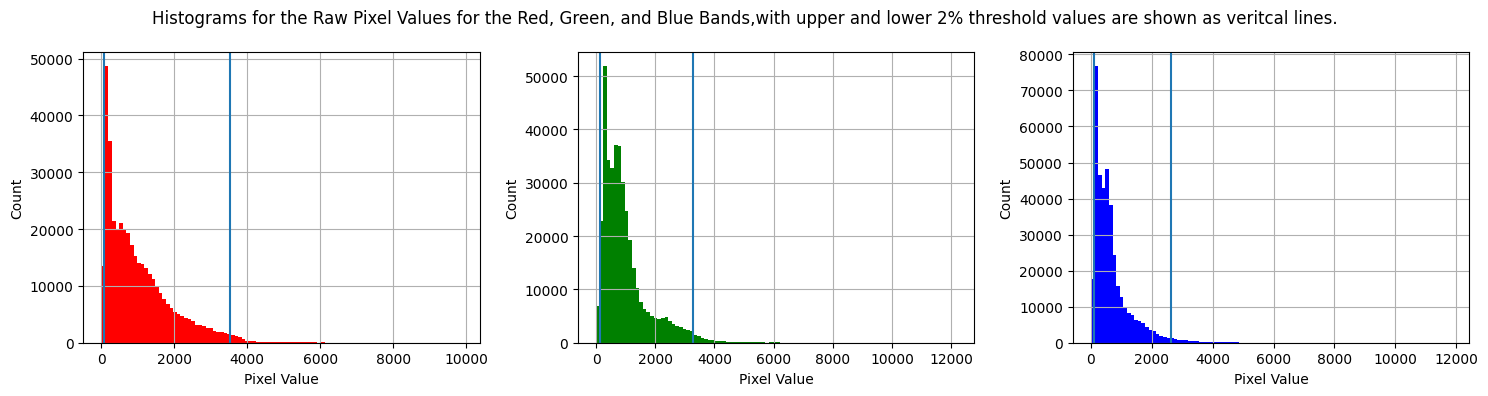

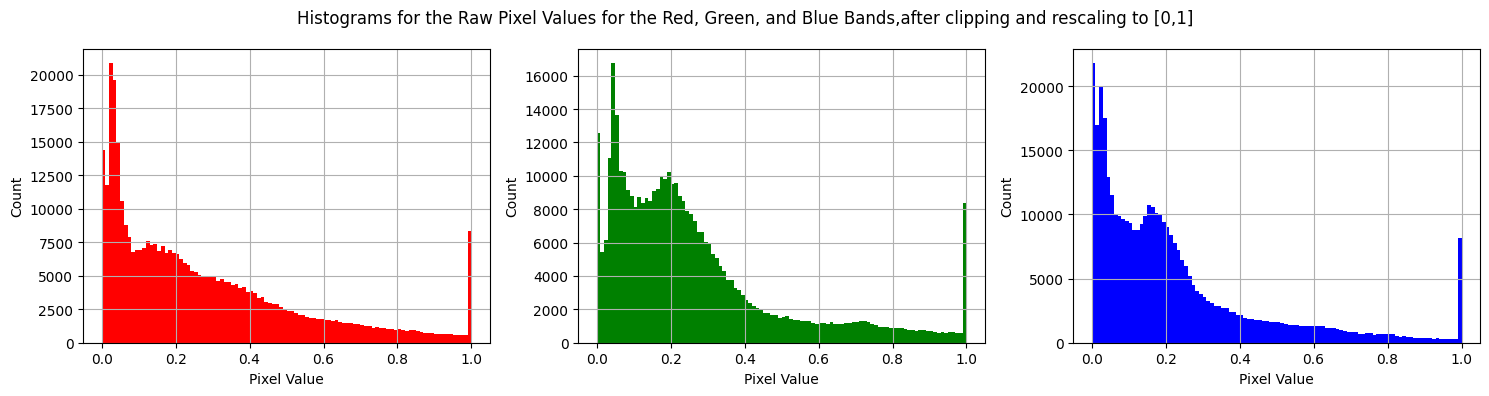

In [14]:
# Clip the upper and lower 2% in each band, then rescale to [0,1] and show the image.

# Create the RGB image, populated with the raw values for each band.
imRGB = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]

# Plot histograms of the pixel values before clipping.
fig, axs = plt.subplots(1,3, figsize=(15,4));
fig.suptitle('Histograms for the Raw Pixel Values for the Red, Green, and Blue Bands,'+
             'with upper and lower 2% threshold values are shown as veritcal lines.')
for i,clr in enumerate(['Red', 'Green', 'Blue']):
    axs[i].hist(imRGB[:,:,i].flatten(), bins=100, color=clr)
    lower_thresh = np.percentile(imRGB[:,:,i].flatten(), 2)
    axs[i].axvline(lower_thresh)
    upper_thresh = np.percentile(imRGB[:,:,i].flatten(), 98)
    axs[i].axvline(upper_thresh)
    axs[i].set_xlabel('Pixel Value')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)
plt.tight_layout()

# Clip the bands
imRGB_clipped = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]
for i in range(3):
    # Create a variable to hold a single band from the image. 
    # This is not the most computationally efficient method, but simplifies the code.
    single_band = imRGB_clipped[:,:,i]
    # Clip the band
    lower_thresh = np.percentile(single_band.flatten(), 2)
    single_band[single_band < lower_thresh] = lower_thresh
    upper_thresh = np.percentile(single_band.flatten(), 98)
    single_band[single_band > upper_thresh] = upper_thresh
    # Rescale to [0,1].
    single_band = single_band - lower_thresh
    single_band = single_band / np.max(single_band)
    # Put the values for this band back into the RGB image.
    imRGB_clipped[:,:,i] = single_band

# Plot histograms of the pixel values after clipping.
fig, axs = plt.subplots(1,3, figsize=(15,4));
fig.suptitle('Histograms for the Raw Pixel Values for the Red, Green, and Blue Bands,'+
             'after clipping and rescaling to [0,1]')
for i,clr in enumerate(['Red', 'Green', 'Blue']):
    axs[i].hist(imRGB_clipped[:,:,i].flatten(), bins=100, color=clr)
    axs[i].set_xlabel('Pixel Value')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)
plt.tight_layout()

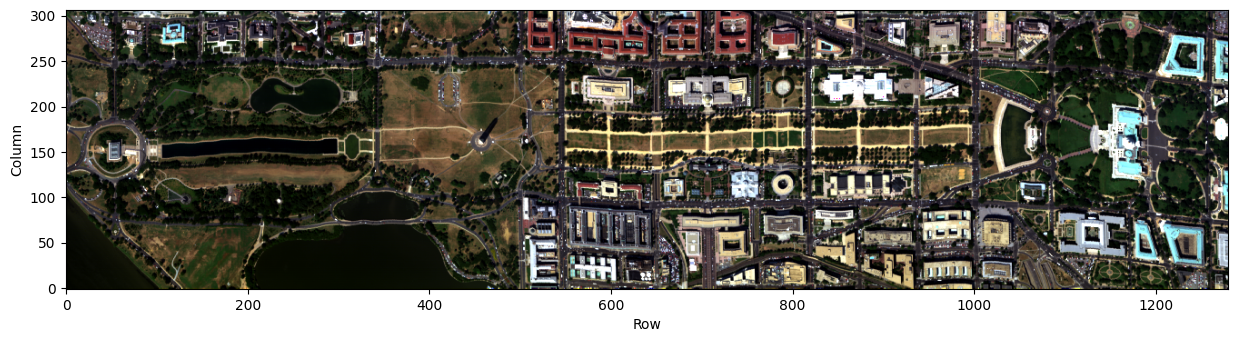

In [15]:
# Plot the clipped and rescaled image.
plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(imRGB_clipped), axis=0));
plt.gca().invert_yaxis()  
plt.xlabel('Row');
plt.ylabel('Column');

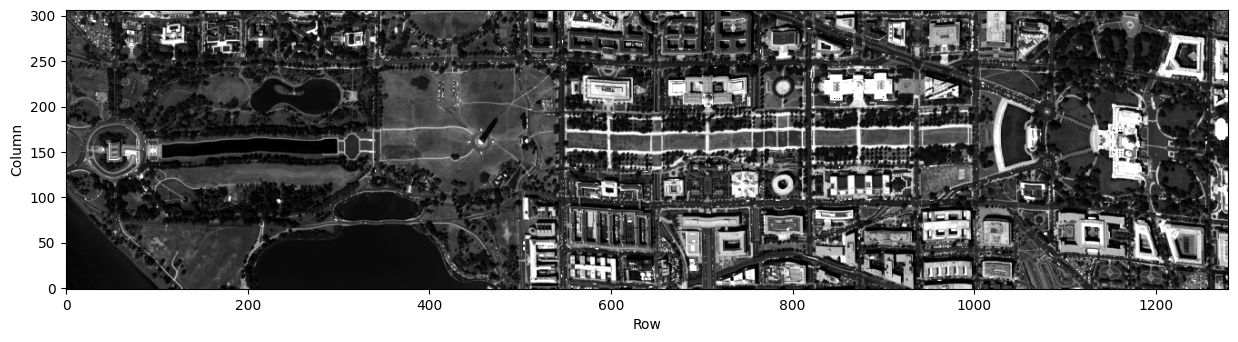

In [16]:
# View a single band from the clipped image as a grayscale image.
plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(imRGB_clipped[:,:,1]), axis=0), cmap='gray');
plt.gca().invert_yaxis()  
plt.xlabel('Row');
plt.ylabel('Column');

# PART 3: Viewing pixel spectra from the image.

A simple visualization of the image, a labeled pixel, and the spectrum.

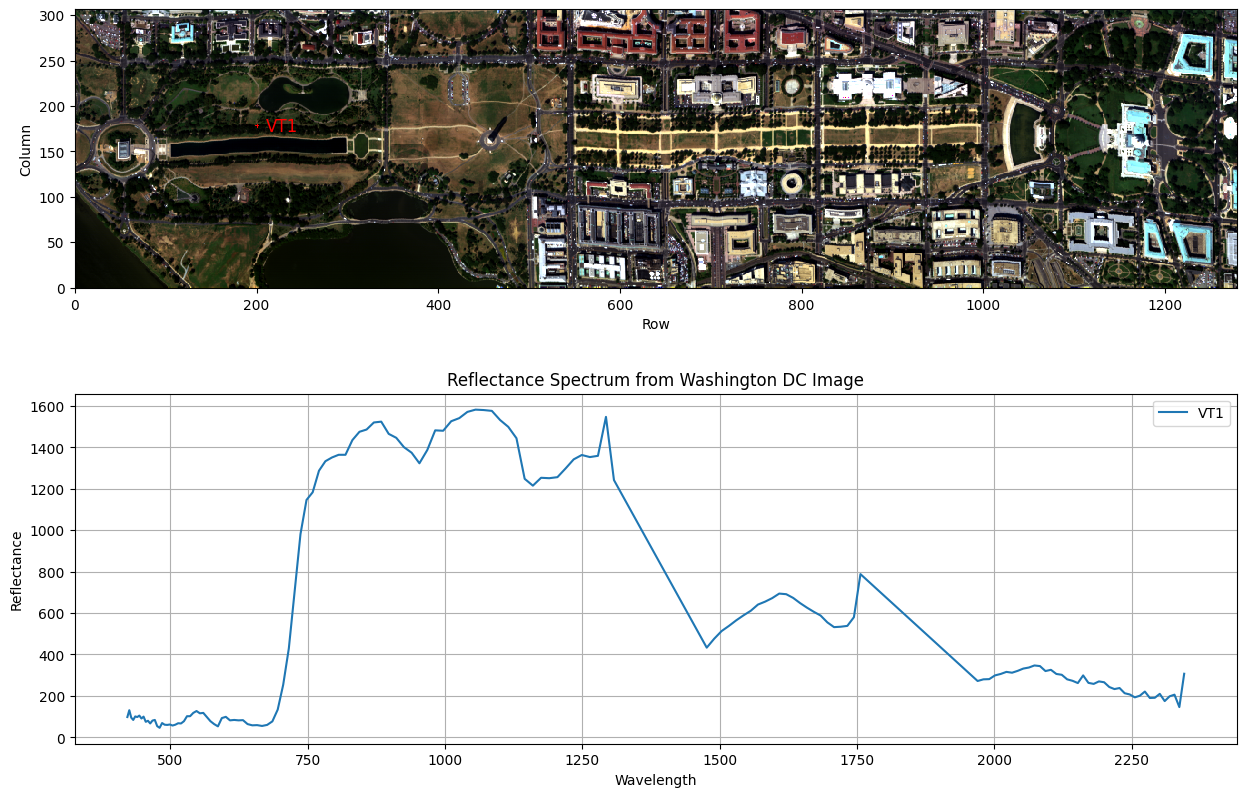

In [17]:
# Select coordinates for some pixels
loc = [200,178] # Location for the pixel
name = 'VT1'

# Create a copy of the image
imRGBlabeled = copy.copy(imRGB_clipped)
plt.figure(figsize=(15,10)) # Create a figure with width=15, height=10
plt.subplot(2, 1, 1) # Create a grid of subplots with 2 rows and 1 column, and make plot 1 current
r,c = loc # get the row and column for the pixel
# Create a red plus-sign at the pixel.
for dr in range(-2,3):
    imRGBlabeled[r+dr, c, :] = [1,0,0]
for dc in range(-2,3):
    imRGBlabeled[r, c+dc, :] = [1,0,0]
plt.imshow(np.flip(np.rot90(imRGBlabeled), axis=0), interpolation='nearest');
plt.gca().invert_yaxis()  
plt.text(r+10, c, name, size=12, c='r', ha='left', va='center') # Add the label
plt.xlabel('Row');
plt.ylabel('Column');

plt.subplot(2, 1, 2) # For the grid of subplots with 2 rows and 1 column, and make plot 2 current
plt.plot(wl,imArr[r,c,:].flatten(), label=name)
plt.grid(True)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectrum from Washington DC Image')
plt.legend();

In [18]:
def plot_im_spectra(imArrRGB, imArr, locs):# Create a copy of the image
    # Show the image imArr with the locations labeled
    # Inputs:
    #    imArr: 3-dimensional numpy array for the spectral iamge
    #    locations: list of [row,column,name] for each pixel of interest
    
    imRGBlabeled = copy.copy(imArrRGB)

    plt.figure(figsize=(15,10)) 
    plt.subplot(2, 1, 1) 
    for r,c,n,clr in locs:
        # Create a red plus-sign at the pixel.
        for dr in range(-2,3):
            imRGBlabeled[r+dr, c, :] = colors.to_rgb(clr)
        for dc in range(-2,3):
            imRGBlabeled[r, c+dc, :] = colors.to_rgb(clr)
    # show the image
    plt.imshow(np.flip(np.rot90(imRGBlabeled), axis=0), interpolation='nearest');
    plt.gca().invert_yaxis()  
    # Add the pixel markers and labels
    for r,c,n,clr in locs:
        plt.text(r+10, c, n, size=12, color=clr, ha='left', va='center') # Add the label
    plt.xlabel('Row');
    plt.ylabel('Column');

    # Plot the spectra
    plt.subplot(2, 1, 2) 
    for r,c,n,clr in locs:
        plt.plot(wl,imArr[r,c,:].flatten(), label=n, color=clr)
    plt.grid(True)
    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title('Reflectance Spectra from Washington DC Image')
    plt.legend();

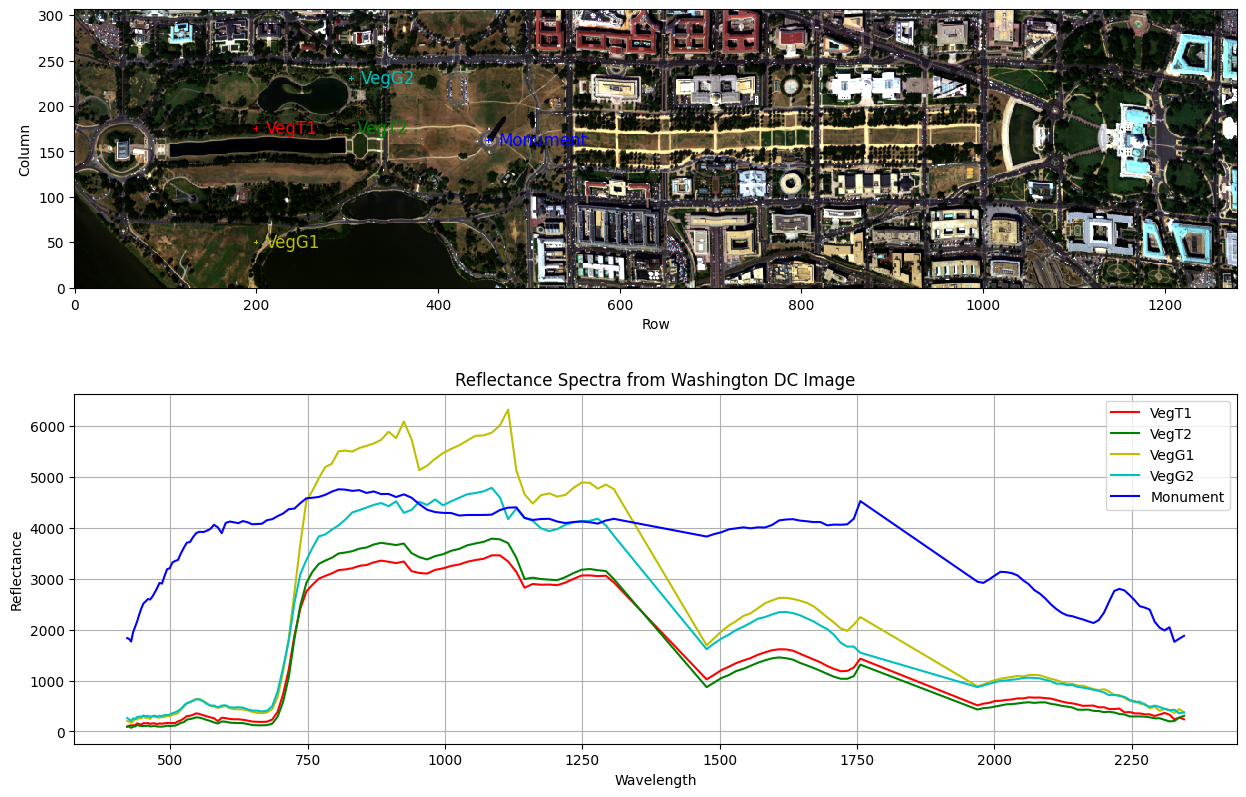

In [19]:
locs = [[200,175,'VegT1','r'], [300,175,'VegT2','g'], 
        [200,50,'VegG1','y'], [305,230,'VegG2','c'], 
        [456,162,'Monument','b']]
plot_im_spectra(imRGB_clipped, imArr, locs)

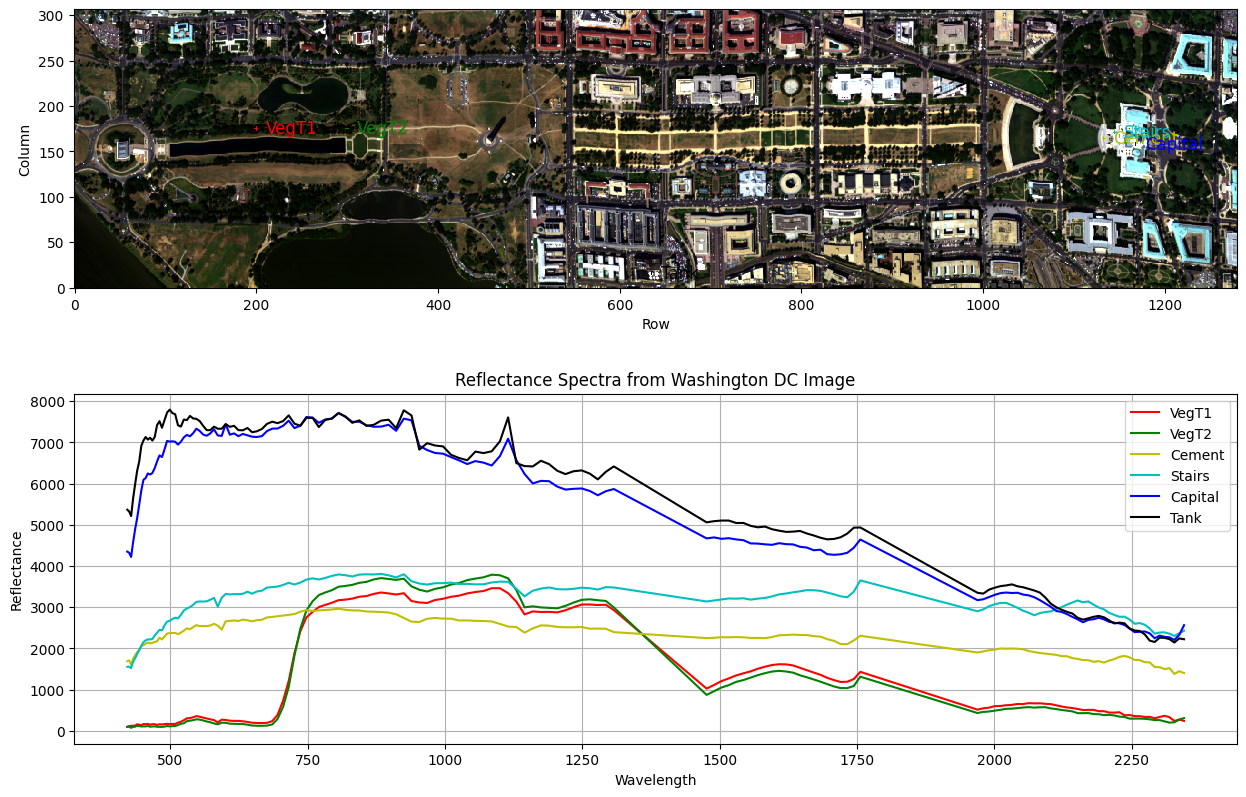

In [20]:
locs = [[200,175,'VegT1','r'], [300,175,'VegT2','g'], 
        [1133, 164, 'Cement','y'], [1145,171,'Stairs','c'], 
        [1168,158,'Capital','b'], [635,16,'Tank','black']]
plot_im_spectra(imRGB_clipped, imArr, locs)

# Conclusion:
### The capital dome is most closely related to the painted metal tank as opposed to the cement walkway and stairs.